## GReaT Example with Iris Dataset

In [1]:
# Execute only once!
import os
import sys
sys.path.append("..")
os.chdir("..")

os.environ["CUDA_VISIBLE_DEVICES"]="1"

In [2]:
import numpy as np
import pandas as pd
import logging

In [3]:
from examples.utils import set_logging_level
from be_great import GReaT

/data/guoquanjiang/envs/begreat/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
import matplotlib.pyplot as plt

In [5]:
logger = set_logging_level(logging.INFO)
data = pd.read_csv('C:/Users/Windows 11/Desktop/Dissertation/Codes/data/diabetic_data.csv')
data.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


### Create GReaT Model

In [10]:
great = GReaT("C:/Users/Windows 11/Desktop/Dissertation/Codes/models/iiBcai/gpt2",                  # Name of the large language model used (see HuggingFace for more options)
              epochs=1,                   # Number of epochs to train
              save_steps=2000,               # Save model weights every x steps
              logging_steps=100,             # Log the loss and learning rate every x steps
              experiment_dir="trainer_diabetic", # Name of the directory where all intermediate steps are saved
              batch_size=64                # Batch Size
              #lr_scheduler_type="constant", # Specify the learning rate scheduler 
              #learning_rate=5e-5            # Set the inital learning rate
            #   efficient_finetuning="lora"
             )

### Start Training

In [11]:
trainer = great.fit(data)

2024-06-30 21:10:47,370 - INFO - Convert data into HuggingFace dataset object... (great.py:361)


2024-06-30 21:10:47,615 - INFO - Create GReaT Trainer... (great.py:366)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
2024-06-30 21:10:48,016 - INFO - Start training... (great.py:382)
You're using a GPT2TokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


Step,Training Loss
100,1.026800
200,0.714200
300,0.683400
400,0.666400
500,0.656500
600,0.649700
700,0.645200
800,0.641300
900,0.639200
1000,0.637100


In [12]:
loss_hist = trainer.state.log_history.copy()
loss_hist.pop()

{'train_runtime': 3412.7292,
 'train_samples_per_second': 29.82,
 'train_steps_per_second': 0.466,
 'total_flos': 1.9621266861312e+16,
 'train_loss': 0.6726297202311096,
 'epoch': 1.0,
 'step': 1591}

In [13]:
loss = [x["loss"] for x in loss_hist]
epochs = [x["epoch"] for x in loss_hist]

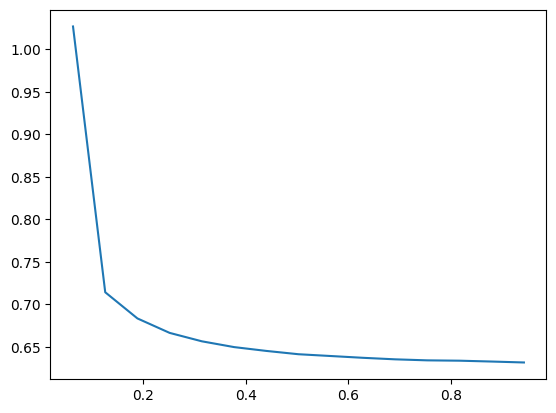

In [14]:
plt.plot(epochs, loss)

### Save Model

In [11]:
great.save("travel")

### Load Model

In [15]:
# great = GReaT.load_from_dir("iris")

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.
Loading checkpoint shards: 100%|██████████| 4/4 [00:02<00:00,  1.67it/s]


RuntimeError: Error(s) in loading state_dict for LlamaForCausalLM:
	Missing key(s) in state_dict: "model.embed_tokens.weight", "model.layers.0.self_attn.q_proj.weight", "model.layers.0.self_attn.k_proj.weight", "model.layers.0.self_attn.v_proj.weight", "model.layers.0.self_attn.o_proj.weight", "model.layers.0.mlp.gate_proj.weight", "model.layers.0.mlp.up_proj.weight", "model.layers.0.mlp.down_proj.weight", "model.layers.0.input_layernorm.weight", "model.layers.0.post_attention_layernorm.weight", "model.layers.1.self_attn.q_proj.weight", "model.layers.1.self_attn.k_proj.weight", "model.layers.1.self_attn.v_proj.weight", "model.layers.1.self_attn.o_proj.weight", "model.layers.1.mlp.gate_proj.weight", "model.layers.1.mlp.up_proj.weight", "model.layers.1.mlp.down_proj.weight", "model.layers.1.input_layernorm.weight", "model.layers.1.post_attention_layernorm.weight", "model.layers.2.self_attn.q_proj.weight", "model.layers.2.self_attn.k_proj.weight", "model.layers.2.self_attn.v_proj.weight", "model.layers.2.self_attn.o_proj.weight", "model.layers.2.mlp.gate_proj.weight", "model.layers.2.mlp.up_proj.weight", "model.layers.2.mlp.down_proj.weight", "model.layers.2.input_layernorm.weight", "model.layers.2.post_attention_layernorm.weight", "model.layers.3.self_attn.q_proj.weight", "model.layers.3.self_attn.k_proj.weight", "model.layers.3.self_attn.v_proj.weight", "model.layers.3.self_attn.o_proj.weight", "model.layers.3.mlp.gate_proj.weight", "model.layers.3.mlp.up_proj.weight", "model.layers.3.mlp.down_proj.weight", "model.layers.3.input_layernorm.weight", "model.layers.3.post_attention_layernorm.weight", "model.layers.4.self_attn.q_proj.weight", "model.layers.4.self_attn.k_proj.weight", "model.layers.4.self_attn.v_proj.weight", "model.layers.4.self_attn.o_proj.weight", "model.layers.4.mlp.gate_proj.weight", "model.layers.4.mlp.up_proj.weight", "model.layers.4.mlp.down_proj.weight", "model.layers.4.input_layernorm.weight", "model.layers.4.post_attention_layernorm.weight", "model.layers.5.self_attn.q_proj.weight", "model.layers.5.self_attn.k_proj.weight", "model.layers.5.self_attn.v_proj.weight", "model.layers.5.self_attn.o_proj.weight", "model.layers.5.mlp.gate_proj.weight", "model.layers.5.mlp.up_proj.weight", "model.layers.5.mlp.down_proj.weight", "model.layers.5.input_layernorm.weight", "model.layers.5.post_attention_layernorm.weight", "model.layers.6.self_attn.q_proj.weight", "model.layers.6.self_attn.k_proj.weight", "model.layers.6.self_attn.v_proj.weight", "model.layers.6.self_attn.o_proj.weight", "model.layers.6.mlp.gate_proj.weight", "model.layers.6.mlp.up_proj.weight", "model.layers.6.mlp.down_proj.weight", "model.layers.6.input_layernorm.weight", "model.layers.6.post_attention_layernorm.weight", "model.layers.7.self_attn.q_proj.weight", "model.layers.7.self_attn.k_proj.weight", "model.layers.7.self_attn.v_proj.weight", "model.layers.7.self_attn.o_proj.weight", "model.layers.7.mlp.gate_proj.weight", "model.layers.7.mlp.up_proj.weight", "model.layers.7.mlp.down_proj.weight", "model.layers.7.input_layernorm.weight", "model.layers.7.post_attention_layernorm.weight", "model.layers.8.self_attn.q_proj.weight", "model.layers.8.self_attn.k_proj.weight", "model.layers.8.self_attn.v_proj.weight", "model.layers.8.self_attn.o_proj.weight", "model.layers.8.mlp.gate_proj.weight", "model.layers.8.mlp.up_proj.weight", "model.layers.8.mlp.down_proj.weight", "model.layers.8.input_layernorm.weight", "model.layers.8.post_attention_layernorm.weight", "model.layers.9.self_attn.q_proj.weight", "model.layers.9.self_attn.k_proj.weight", "model.layers.9.self_attn.v_proj.weight", "model.layers.9.self_attn.o_proj.weight", "model.layers.9.mlp.gate_proj.weight", "model.layers.9.mlp.up_proj.weight", "model.layers.9.mlp.down_proj.weight", "model.layers.9.input_layernorm.weight", "model.layers.9.post_attention_layernorm.weight", "model.layers.10.self_attn.q_proj.weight", "model.layers.10.self_attn.k_proj.weight", "model.layers.10.self_attn.v_proj.weight", "model.layers.10.self_attn.o_proj.weight", "model.layers.10.mlp.gate_proj.weight", "model.layers.10.mlp.up_proj.weight", "model.layers.10.mlp.down_proj.weight", "model.layers.10.input_layernorm.weight", "model.layers.10.post_attention_layernorm.weight", "model.layers.11.self_attn.q_proj.weight", "model.layers.11.self_attn.k_proj.weight", "model.layers.11.self_attn.v_proj.weight", "model.layers.11.self_attn.o_proj.weight", "model.layers.11.mlp.gate_proj.weight", "model.layers.11.mlp.up_proj.weight", "model.layers.11.mlp.down_proj.weight", "model.layers.11.input_layernorm.weight", "model.layers.11.post_attention_layernorm.weight", "model.layers.12.self_attn.q_proj.weight", "model.layers.12.self_attn.k_proj.weight", "model.layers.12.self_attn.v_proj.weight", "model.layers.12.self_attn.o_proj.weight", "model.layers.12.mlp.gate_proj.weight", "model.layers.12.mlp.up_proj.weight", "model.layers.12.mlp.down_proj.weight", "model.layers.12.input_layernorm.weight", "model.layers.12.post_attention_layernorm.weight", "model.layers.13.self_attn.q_proj.weight", "model.layers.13.self_attn.k_proj.weight", "model.layers.13.self_attn.v_proj.weight", "model.layers.13.self_attn.o_proj.weight", "model.layers.13.mlp.gate_proj.weight", "model.layers.13.mlp.up_proj.weight", "model.layers.13.mlp.down_proj.weight", "model.layers.13.input_layernorm.weight", "model.layers.13.post_attention_layernorm.weight", "model.layers.14.self_attn.q_proj.weight", "model.layers.14.self_attn.k_proj.weight", "model.layers.14.self_attn.v_proj.weight", "model.layers.14.self_attn.o_proj.weight", "model.layers.14.mlp.gate_proj.weight", "model.layers.14.mlp.up_proj.weight", "model.layers.14.mlp.down_proj.weight", "model.layers.14.input_layernorm.weight", "model.layers.14.post_attention_layernorm.weight", "model.layers.15.self_attn.q_proj.weight", "model.layers.15.self_attn.k_proj.weight", "model.layers.15.self_attn.v_proj.weight", "model.layers.15.self_attn.o_proj.weight", "model.layers.15.mlp.gate_proj.weight", "model.layers.15.mlp.up_proj.weight", "model.layers.15.mlp.down_proj.weight", "model.layers.15.input_layernorm.weight", "model.layers.15.post_attention_layernorm.weight", "model.layers.16.self_attn.q_proj.weight", "model.layers.16.self_attn.k_proj.weight", "model.layers.16.self_attn.v_proj.weight", "model.layers.16.self_attn.o_proj.weight", "model.layers.16.mlp.gate_proj.weight", "model.layers.16.mlp.up_proj.weight", "model.layers.16.mlp.down_proj.weight", "model.layers.16.input_layernorm.weight", "model.layers.16.post_attention_layernorm.weight", "model.layers.17.self_attn.q_proj.weight", "model.layers.17.self_attn.k_proj.weight", "model.layers.17.self_attn.v_proj.weight", "model.layers.17.self_attn.o_proj.weight", "model.layers.17.mlp.gate_proj.weight", "model.layers.17.mlp.up_proj.weight", "model.layers.17.mlp.down_proj.weight", "model.layers.17.input_layernorm.weight", "model.layers.17.post_attention_layernorm.weight", "model.layers.18.self_attn.q_proj.weight", "model.layers.18.self_attn.k_proj.weight", "model.layers.18.self_attn.v_proj.weight", "model.layers.18.self_attn.o_proj.weight", "model.layers.18.mlp.gate_proj.weight", "model.layers.18.mlp.up_proj.weight", "model.layers.18.mlp.down_proj.weight", "model.layers.18.input_layernorm.weight", "model.layers.18.post_attention_layernorm.weight", "model.layers.19.self_attn.q_proj.weight", "model.layers.19.self_attn.k_proj.weight", "model.layers.19.self_attn.v_proj.weight", "model.layers.19.self_attn.o_proj.weight", "model.layers.19.mlp.gate_proj.weight", "model.layers.19.mlp.up_proj.weight", "model.layers.19.mlp.down_proj.weight", "model.layers.19.input_layernorm.weight", "model.layers.19.post_attention_layernorm.weight", "model.layers.20.self_attn.q_proj.weight", "model.layers.20.self_attn.k_proj.weight", "model.layers.20.self_attn.v_proj.weight", "model.layers.20.self_attn.o_proj.weight", "model.layers.20.mlp.gate_proj.weight", "model.layers.20.mlp.up_proj.weight", "model.layers.20.mlp.down_proj.weight", "model.layers.20.input_layernorm.weight", "model.layers.20.post_attention_layernorm.weight", "model.layers.21.self_attn.q_proj.weight", "model.layers.21.self_attn.k_proj.weight", "model.layers.21.self_attn.v_proj.weight", "model.layers.21.self_attn.o_proj.weight", "model.layers.21.mlp.gate_proj.weight", "model.layers.21.mlp.up_proj.weight", "model.layers.21.mlp.down_proj.weight", "model.layers.21.input_layernorm.weight", "model.layers.21.post_attention_layernorm.weight", "model.layers.22.self_attn.q_proj.weight", "model.layers.22.self_attn.k_proj.weight", "model.layers.22.self_attn.v_proj.weight", "model.layers.22.self_attn.o_proj.weight", "model.layers.22.mlp.gate_proj.weight", "model.layers.22.mlp.up_proj.weight", "model.layers.22.mlp.down_proj.weight", "model.layers.22.input_layernorm.weight", "model.layers.22.post_attention_layernorm.weight", "model.layers.23.self_attn.q_proj.weight", "model.layers.23.self_attn.k_proj.weight", "model.layers.23.self_attn.v_proj.weight", "model.layers.23.self_attn.o_proj.weight", "model.layers.23.mlp.gate_proj.weight", "model.layers.23.mlp.up_proj.weight", "model.layers.23.mlp.down_proj.weight", "model.layers.23.input_layernorm.weight", "model.layers.23.post_attention_layernorm.weight", "model.layers.24.self_attn.q_proj.weight", "model.layers.24.self_attn.k_proj.weight", "model.layers.24.self_attn.v_proj.weight", "model.layers.24.self_attn.o_proj.weight", "model.layers.24.mlp.gate_proj.weight", "model.layers.24.mlp.up_proj.weight", "model.layers.24.mlp.down_proj.weight", "model.layers.24.input_layernorm.weight", "model.layers.24.post_attention_layernorm.weight", "model.layers.25.self_attn.q_proj.weight", "model.layers.25.self_attn.k_proj.weight", "model.layers.25.self_attn.v_proj.weight", "model.layers.25.self_attn.o_proj.weight", "model.layers.25.mlp.gate_proj.weight", "model.layers.25.mlp.up_proj.weight", "model.layers.25.mlp.down_proj.weight", "model.layers.25.input_layernorm.weight", "model.layers.25.post_attention_layernorm.weight", "model.layers.26.self_attn.q_proj.weight", "model.layers.26.self_attn.k_proj.weight", "model.layers.26.self_attn.v_proj.weight", "model.layers.26.self_attn.o_proj.weight", "model.layers.26.mlp.gate_proj.weight", "model.layers.26.mlp.up_proj.weight", "model.layers.26.mlp.down_proj.weight", "model.layers.26.input_layernorm.weight", "model.layers.26.post_attention_layernorm.weight", "model.layers.27.self_attn.q_proj.weight", "model.layers.27.self_attn.k_proj.weight", "model.layers.27.self_attn.v_proj.weight", "model.layers.27.self_attn.o_proj.weight", "model.layers.27.mlp.gate_proj.weight", "model.layers.27.mlp.up_proj.weight", "model.layers.27.mlp.down_proj.weight", "model.layers.27.input_layernorm.weight", "model.layers.27.post_attention_layernorm.weight", "model.layers.28.self_attn.q_proj.weight", "model.layers.28.self_attn.k_proj.weight", "model.layers.28.self_attn.v_proj.weight", "model.layers.28.self_attn.o_proj.weight", "model.layers.28.mlp.gate_proj.weight", "model.layers.28.mlp.up_proj.weight", "model.layers.28.mlp.down_proj.weight", "model.layers.28.input_layernorm.weight", "model.layers.28.post_attention_layernorm.weight", "model.layers.29.self_attn.q_proj.weight", "model.layers.29.self_attn.k_proj.weight", "model.layers.29.self_attn.v_proj.weight", "model.layers.29.self_attn.o_proj.weight", "model.layers.29.mlp.gate_proj.weight", "model.layers.29.mlp.up_proj.weight", "model.layers.29.mlp.down_proj.weight", "model.layers.29.input_layernorm.weight", "model.layers.29.post_attention_layernorm.weight", "model.layers.30.self_attn.q_proj.weight", "model.layers.30.self_attn.k_proj.weight", "model.layers.30.self_attn.v_proj.weight", "model.layers.30.self_attn.o_proj.weight", "model.layers.30.mlp.gate_proj.weight", "model.layers.30.mlp.up_proj.weight", "model.layers.30.mlp.down_proj.weight", "model.layers.30.input_layernorm.weight", "model.layers.30.post_attention_layernorm.weight", "model.layers.31.self_attn.q_proj.weight", "model.layers.31.self_attn.k_proj.weight", "model.layers.31.self_attn.v_proj.weight", "model.layers.31.self_attn.o_proj.weight", "model.layers.31.mlp.gate_proj.weight", "model.layers.31.mlp.up_proj.weight", "model.layers.31.mlp.down_proj.weight", "model.layers.31.input_layernorm.weight", "model.layers.31.post_attention_layernorm.weight", "model.norm.weight", "lm_head.weight". 
	Unexpected key(s) in state_dict: "base_model.model.model.embed_tokens.weight", "base_model.model.model.layers.0.self_attn.q_proj.base_layer.weight", "base_model.model.model.layers.0.self_attn.q_proj.lora_A.default.weight", "base_model.model.model.layers.0.self_attn.q_proj.lora_B.default.weight", "base_model.model.model.layers.0.self_attn.k_proj.base_layer.weight", "base_model.model.model.layers.0.self_attn.k_proj.lora_A.default.weight", "base_model.model.model.layers.0.self_attn.k_proj.lora_B.default.weight", "base_model.model.model.layers.0.self_attn.v_proj.base_layer.weight", "base_model.model.model.layers.0.self_attn.v_proj.lora_A.default.weight", "base_model.model.model.layers.0.self_attn.v_proj.lora_B.default.weight", "base_model.model.model.layers.0.self_attn.o_proj.base_layer.weight", "base_model.model.model.layers.0.self_attn.o_proj.lora_A.default.weight", "base_model.model.model.layers.0.self_attn.o_proj.lora_B.default.weight", "base_model.model.model.layers.0.mlp.gate_proj.base_layer.weight", "base_model.model.model.layers.0.mlp.gate_proj.lora_A.default.weight", "base_model.model.model.layers.0.mlp.gate_proj.lora_B.default.weight", "base_model.model.model.layers.0.mlp.up_proj.base_layer.weight", "base_model.model.model.layers.0.mlp.up_proj.lora_A.default.weight", "base_model.model.model.layers.0.mlp.up_proj.lora_B.default.weight", "base_model.model.model.layers.0.mlp.down_proj.base_layer.weight", "base_model.model.model.layers.0.mlp.down_proj.lora_A.default.weight", "base_model.model.model.layers.0.mlp.down_proj.lora_B.default.weight", "base_model.model.model.layers.0.input_layernorm.weight", "base_model.model.model.layers.0.post_attention_layernorm.weight", "base_model.model.model.layers.1.self_attn.q_proj.base_layer.weight", "base_model.model.model.layers.1.self_attn.q_proj.lora_A.default.weight", "base_model.model.model.layers.1.self_attn.q_proj.lora_B.default.weight", "base_model.model.model.layers.1.self_attn.k_proj.base_layer.weight", "base_model.model.model.layers.1.self_attn.k_proj.lora_A.default.weight", "base_model.model.model.layers.1.self_attn.k_proj.lora_B.default.weight", "base_model.model.model.layers.1.self_attn.v_proj.base_layer.weight", "base_model.model.model.layers.1.self_attn.v_proj.lora_A.default.weight", "base_model.model.model.layers.1.self_attn.v_proj.lora_B.default.weight", "base_model.model.model.layers.1.self_attn.o_proj.base_layer.weight", "base_model.model.model.layers.1.self_attn.o_proj.lora_A.default.weight", "base_model.model.model.layers.1.self_attn.o_proj.lora_B.default.weight", "base_model.model.model.layers.1.mlp.gate_proj.base_layer.weight", "base_model.model.model.layers.1.mlp.gate_proj.lora_A.default.weight", "base_model.model.model.layers.1.mlp.gate_proj.lora_B.default.weight", "base_model.model.model.layers.1.mlp.up_proj.base_layer.weight", "base_model.model.model.layers.1.mlp.up_proj.lora_A.default.weight", "base_model.model.model.layers.1.mlp.up_proj.lora_B.default.weight", "base_model.model.model.layers.1.mlp.down_proj.base_layer.weight", "base_model.model.model.layers.1.mlp.down_proj.lora_A.default.weight", "base_model.model.model.layers.1.mlp.down_proj.lora_B.default.weight", "base_model.model.model.layers.1.input_layernorm.weight", "base_model.model.model.layers.1.post_attention_layernorm.weight", "base_model.model.model.layers.2.self_attn.q_proj.base_layer.weight", "base_model.model.model.layers.2.self_attn.q_proj.lora_A.default.weight", "base_model.model.model.layers.2.self_attn.q_proj.lora_B.default.weight", "base_model.model.model.layers.2.self_attn.k_proj.base_layer.weight", "base_model.model.model.layers.2.self_attn.k_proj.lora_A.default.weight", "base_model.model.model.layers.2.self_attn.k_proj.lora_B.default.weight", "base_model.model.model.layers.2.self_attn.v_proj.base_layer.weight", "base_model.model.model.layers.2.self_attn.v_proj.lora_A.default.weight", "base_model.model.model.layers.2.self_attn.v_proj.lora_B.default.weight", "base_model.model.model.layers.2.self_attn.o_proj.base_layer.weight", "base_model.model.model.layers.2.self_attn.o_proj.lora_A.default.weight", "base_model.model.model.layers.2.self_attn.o_proj.lora_B.default.weight", "base_model.model.model.layers.2.mlp.gate_proj.base_layer.weight", "base_model.model.model.layers.2.mlp.gate_proj.lora_A.default.weight", "base_model.model.model.layers.2.mlp.gate_proj.lora_B.default.weight", "base_model.model.model.layers.2.mlp.up_proj.base_layer.weight", "base_model.model.model.layers.2.mlp.up_proj.lora_A.default.weight", "base_model.model.model.layers.2.mlp.up_proj.lora_B.default.weight", "base_model.model.model.layers.2.mlp.down_proj.base_layer.weight", "base_model.model.model.layers.2.mlp.down_proj.lora_A.default.weight", "base_model.model.model.layers.2.mlp.down_proj.lora_B.default.weight", "base_model.model.model.layers.2.input_layernorm.weight", "base_model.model.model.layers.2.post_attention_layernorm.weight", "base_model.model.model.layers.3.self_attn.q_proj.base_layer.weight", "base_model.model.model.layers.3.self_attn.q_proj.lora_A.default.weight", "base_model.model.model.layers.3.self_attn.q_proj.lora_B.default.weight", "base_model.model.model.layers.3.self_attn.k_proj.base_layer.weight", "base_model.model.model.layers.3.self_attn.k_proj.lora_A.default.weight", "base_model.model.model.layers.3.self_attn.k_proj.lora_B.default.weight", "base_model.model.model.layers.3.self_attn.v_proj.base_layer.weight", "base_model.model.model.layers.3.self_attn.v_proj.lora_A.default.weight", "base_model.model.model.layers.3.self_attn.v_proj.lora_B.default.weight", "base_model.model.model.layers.3.self_attn.o_proj.base_layer.weight", "base_model.model.model.layers.3.self_attn.o_proj.lora_A.default.weight", "base_model.model.model.layers.3.self_attn.o_proj.lora_B.default.weight", "base_model.model.model.layers.3.mlp.gate_proj.base_layer.weight", "base_model.model.model.layers.3.mlp.gate_proj.lora_A.default.weight", "base_model.model.model.layers.3.mlp.gate_proj.lora_B.default.weight", "base_model.model.model.layers.3.mlp.up_proj.base_layer.weight", "base_model.model.model.layers.3.mlp.up_proj.lora_A.default.weight", "base_model.model.model.layers.3.mlp.up_proj.lora_B.default.weight", "base_model.model.model.layers.3.mlp.down_proj.base_layer.weight", "base_model.model.model.layers.3.mlp.down_proj.lora_A.default.weight", "base_model.model.model.layers.3.mlp.down_proj.lora_B.default.weight", "base_model.model.model.layers.3.input_layernorm.weight", "base_model.model.model.layers.3.post_attention_layernorm.weight", "base_model.model.model.layers.4.self_attn.q_proj.base_layer.weight", "base_model.model.model.layers.4.self_attn.q_proj.lora_A.default.weight", "base_model.model.model.layers.4.self_attn.q_proj.lora_B.default.weight", "base_model.model.model.layers.4.self_attn.k_proj.base_layer.weight", "base_model.model.model.layers.4.self_attn.k_proj.lora_A.default.weight", "base_model.model.model.layers.4.self_attn.k_proj.lora_B.default.weight", "base_model.model.model.layers.4.self_attn.v_proj.base_layer.weight", "base_model.model.model.layers.4.self_attn.v_proj.lora_A.default.weight", "base_model.model.model.layers.4.self_attn.v_proj.lora_B.default.weight", "base_model.model.model.layers.4.self_attn.o_proj.base_layer.weight", "base_model.model.model.layers.4.self_attn.o_proj.lora_A.default.weight", "base_model.model.model.layers.4.self_attn.o_proj.lora_B.default.weight", "base_model.model.model.layers.4.mlp.gate_proj.base_layer.weight", "base_model.model.model.layers.4.mlp.gate_proj.lora_A.default.weight", "base_model.model.model.layers.4.mlp.gate_proj.lora_B.default.weight", "base_model.model.model.layers.4.mlp.up_proj.base_layer.weight", "base_model.model.model.layers.4.mlp.up_proj.lora_A.default.weight", "base_model.model.model.layers.4.mlp.up_proj.lora_B.default.weight", "base_model.model.model.layers.4.mlp.down_proj.base_layer.weight", "base_model.model.model.layers.4.mlp.down_proj.lora_A.default.weight", "base_model.model.model.layers.4.mlp.down_proj.lora_B.default.weight", "base_model.model.model.layers.4.input_layernorm.weight", "base_model.model.model.layers.4.post_attention_layernorm.weight", "base_model.model.model.layers.5.self_attn.q_proj.base_layer.weight", "base_model.model.model.layers.5.self_attn.q_proj.lora_A.default.weight", "base_model.model.model.layers.5.self_attn.q_proj.lora_B.default.weight", "base_model.model.model.layers.5.self_attn.k_proj.base_layer.weight", "base_model.model.model.layers.5.self_attn.k_proj.lora_A.default.weight", "base_model.model.model.layers.5.self_attn.k_proj.lora_B.default.weight", "base_model.model.model.layers.5.self_attn.v_proj.base_layer.weight", "base_model.model.model.layers.5.self_attn.v_proj.lora_A.default.weight", "base_model.model.model.layers.5.self_attn.v_proj.lora_B.default.weight", "base_model.model.model.layers.5.self_attn.o_proj.base_layer.weight", "base_model.model.model.layers.5.self_attn.o_proj.lora_A.default.weight", "base_model.model.model.layers.5.self_attn.o_proj.lora_B.default.weight", "base_model.model.model.layers.5.mlp.gate_proj.base_layer.weight", "base_model.model.model.layers.5.mlp.gate_proj.lora_A.default.weight", "base_model.model.model.layers.5.mlp.gate_proj.lora_B.default.weight", "base_model.model.model.layers.5.mlp.up_proj.base_layer.weight", "base_model.model.model.layers.5.mlp.up_proj.lora_A.default.weight", "base_model.model.model.layers.5.mlp.up_proj.lora_B.default.weight", "base_model.model.model.layers.5.mlp.down_proj.base_layer.weight", "base_model.model.model.layers.5.mlp.down_proj.lora_A.default.weight", "base_model.model.model.layers.5.mlp.down_proj.lora_B.default.weight", "base_model.model.model.layers.5.input_layernorm.weight", "base_model.model.model.layers.5.post_attention_layernorm.weight", "base_model.model.model.layers.6.self_attn.q_proj.base_layer.weight", "base_model.model.model.layers.6.self_attn.q_proj.lora_A.default.weight", "base_model.model.model.layers.6.self_attn.q_proj.lora_B.default.weight", "base_model.model.model.layers.6.self_attn.k_proj.base_layer.weight", "base_model.model.model.layers.6.self_attn.k_proj.lora_A.default.weight", "base_model.model.model.layers.6.self_attn.k_proj.lora_B.default.weight", "base_model.model.model.layers.6.self_attn.v_proj.base_layer.weight", "base_model.model.model.layers.6.self_attn.v_proj.lora_A.default.weight", "base_model.model.model.layers.6.self_attn.v_proj.lora_B.default.weight", "base_model.model.model.layers.6.self_attn.o_proj.base_layer.weight", "base_model.model.model.layers.6.self_attn.o_proj.lora_A.default.weight", "base_model.model.model.layers.6.self_attn.o_proj.lora_B.default.weight", "base_model.model.model.layers.6.mlp.gate_proj.base_layer.weight", "base_model.model.model.layers.6.mlp.gate_proj.lora_A.default.weight", "base_model.model.model.layers.6.mlp.gate_proj.lora_B.default.weight", "base_model.model.model.layers.6.mlp.up_proj.base_layer.weight", "base_model.model.model.layers.6.mlp.up_proj.lora_A.default.weight", "base_model.model.model.layers.6.mlp.up_proj.lora_B.default.weight", "base_model.model.model.layers.6.mlp.down_proj.base_layer.weight", "base_model.model.model.layers.6.mlp.down_proj.lora_A.default.weight", "base_model.model.model.layers.6.mlp.down_proj.lora_B.default.weight", "base_model.model.model.layers.6.input_layernorm.weight", "base_model.model.model.layers.6.post_attention_layernorm.weight", "base_model.model.model.layers.7.self_attn.q_proj.base_layer.weight", "base_model.model.model.layers.7.self_attn.q_proj.lora_A.default.weight", "base_model.model.model.layers.7.self_attn.q_proj.lora_B.default.weight", "base_model.model.model.layers.7.self_attn.k_proj.base_layer.weight", "base_model.model.model.layers.7.self_attn.k_proj.lora_A.default.weight", "base_model.model.model.layers.7.self_attn.k_proj.lora_B.default.weight", "base_model.model.model.layers.7.self_attn.v_proj.base_layer.weight", "base_model.model.model.layers.7.self_attn.v_proj.lora_A.default.weight", "base_model.model.model.layers.7.self_attn.v_proj.lora_B.default.weight", "base_model.model.model.layers.7.self_attn.o_proj.base_layer.weight", "base_model.model.model.layers.7.self_attn.o_proj.lora_A.default.weight", "base_model.model.model.layers.7.self_attn.o_proj.lora_B.default.weight", "base_model.model.model.layers.7.mlp.gate_proj.base_layer.weight", "base_model.model.model.layers.7.mlp.gate_proj.lora_A.default.weight", "base_model.model.model.layers.7.mlp.gate_proj.lora_B.default.weight", "base_model.model.model.layers.7.mlp.up_proj.base_layer.weight", "base_model.model.model.layers.7.mlp.up_proj.lora_A.default.weight", "base_model.model.model.layers.7.mlp.up_proj.lora_B.default.weight", "base_model.model.model.layers.7.mlp.down_proj.base_layer.weight", "base_model.model.model.layers.7.mlp.down_proj.lora_A.default.weight", "base_model.model.model.layers.7.mlp.down_proj.lora_B.default.weight", "base_model.model.model.layers.7.input_layernorm.weight", "base_model.model.model.layers.7.post_attention_layernorm.weight", "base_model.model.model.layers.8.self_attn.q_proj.base_layer.weight", "base_model.model.model.layers.8.self_attn.q_proj.lora_A.default.weight", "base_model.model.model.layers.8.self_attn.q_proj.lora_B.default.weight", "base_model.model.model.layers.8.self_attn.k_proj.base_layer.weight", "base_model.model.model.layers.8.self_attn.k_proj.lora_A.default.weight", "base_model.model.model.layers.8.self_attn.k_proj.lora_B.default.weight", "base_model.model.model.layers.8.self_attn.v_proj.base_layer.weight", "base_model.model.model.layers.8.self_attn.v_proj.lora_A.default.weight", "base_model.model.model.layers.8.self_attn.v_proj.lora_B.default.weight", "base_model.model.model.layers.8.self_attn.o_proj.base_layer.weight", "base_model.model.model.layers.8.self_attn.o_proj.lora_A.default.weight", "base_model.model.model.layers.8.self_attn.o_proj.lora_B.default.weight", "base_model.model.model.layers.8.mlp.gate_proj.base_layer.weight", "base_model.model.model.layers.8.mlp.gate_proj.lora_A.default.weight", "base_model.model.model.layers.8.mlp.gate_proj.lora_B.default.weight", "base_model.model.model.layers.8.mlp.up_proj.base_layer.weight", "base_model.model.model.layers.8.mlp.up_proj.lora_A.default.weight", "base_model.model.model.layers.8.mlp.up_proj.lora_B.default.weight", "base_model.model.model.layers.8.mlp.down_proj.base_layer.weight", "base_model.model.model.layers.8.mlp.down_proj.lora_A.default.weight", "base_model.model.model.layers.8.mlp.down_proj.lora_B.default.weight", "base_model.model.model.layers.8.input_layernorm.weight", "base_model.model.model.layers.8.post_attention_layernorm.weight", "base_model.model.model.layers.9.self_attn.q_proj.base_layer.weight", "base_model.model.model.layers.9.self_attn.q_proj.lora_A.default.weight", "base_model.model.model.layers.9.self_attn.q_proj.lora_B.default.weight", "base_model.model.model.layers.9.self_attn.k_proj.base_layer.weight", "base_model.model.model.layers.9.self_attn.k_proj.lora_A.default.weight", "base_model.model.model.layers.9.self_attn.k_proj.lora_B.default.weight", "base_model.model.model.layers.9.self_attn.v_proj.base_layer.weight", "base_model.model.model.layers.9.self_attn.v_proj.lora_A.default.weight", "base_model.model.model.layers.9.self_attn.v_proj.lora_B.default.weight", "base_model.model.model.layers.9.self_attn.o_proj.base_layer.weight", "base_model.model.model.layers.9.self_attn.o_proj.lora_A.default.weight", "base_model.model.model.layers.9.self_attn.o_proj.lora_B.default.weight", "base_model.model.model.layers.9.mlp.gate_proj.base_layer.weight", "base_model.model.model.layers.9.mlp.gate_proj.lora_A.default.weight", "base_model.model.model.layers.9.mlp.gate_proj.lora_B.default.weight", "base_model.model.model.layers.9.mlp.up_proj.base_layer.weight", "base_model.model.model.layers.9.mlp.up_proj.lora_A.default.weight", "base_model.model.model.layers.9.mlp.up_proj.lora_B.default.weight", "base_model.model.model.layers.9.mlp.down_proj.base_layer.weight", "base_model.model.model.layers.9.mlp.down_proj.lora_A.default.weight", "base_model.model.model.layers.9.mlp.down_proj.lora_B.default.weight", "base_model.model.model.layers.9.input_layernorm.weight", "base_model.model.model.layers.9.post_attention_layernorm.weight", "base_model.model.model.layers.10.self_attn.q_proj.base_layer.weight", "base_model.model.model.layers.10.self_attn.q_proj.lora_A.default.weight", "base_model.model.model.layers.10.self_attn.q_proj.lora_B.default.weight", "base_model.model.model.layers.10.self_attn.k_proj.base_layer.weight", "base_model.model.model.layers.10.self_attn.k_proj.lora_A.default.weight", "base_model.model.model.layers.10.self_attn.k_proj.lora_B.default.weight", "base_model.model.model.layers.10.self_attn.v_proj.base_layer.weight", "base_model.model.model.layers.10.self_attn.v_proj.lora_A.default.weight", "base_model.model.model.layers.10.self_attn.v_proj.lora_B.default.weight", "base_model.model.model.layers.10.self_attn.o_proj.base_layer.weight", "base_model.model.model.layers.10.self_attn.o_proj.lora_A.default.weight", "base_model.model.model.layers.10.self_attn.o_proj.lora_B.default.weight", "base_model.model.model.layers.10.mlp.gate_proj.base_layer.weight", "base_model.model.model.layers.10.mlp.gate_proj.lora_A.default.weight", "base_model.model.model.layers.10.mlp.gate_proj.lora_B.default.weight", "base_model.model.model.layers.10.mlp.up_proj.base_layer.weight", "base_model.model.model.layers.10.mlp.up_proj.lora_A.default.weight", "base_model.model.model.layers.10.mlp.up_proj.lora_B.default.weight", "base_model.model.model.layers.10.mlp.down_proj.base_layer.weight", "base_model.model.model.layers.10.mlp.down_proj.lora_A.default.weight", "base_model.model.model.layers.10.mlp.down_proj.lora_B.default.weight", "base_model.model.model.layers.10.input_layernorm.weight", "base_model.model.model.layers.10.post_attention_layernorm.weight", "base_model.model.model.layers.11.self_attn.q_proj.base_layer.weight", "base_model.model.model.layers.11.self_attn.q_proj.lora_A.default.weight", "base_model.model.model.layers.11.self_attn.q_proj.lora_B.default.weight", "base_model.model.model.layers.11.self_attn.k_proj.base_layer.weight", "base_model.model.model.layers.11.self_attn.k_proj.lora_A.default.weight", "base_model.model.model.layers.11.self_attn.k_proj.lora_B.default.weight", "base_model.model.model.layers.11.self_attn.v_proj.base_layer.weight", "base_model.model.model.layers.11.self_attn.v_proj.lora_A.default.weight", "base_model.model.model.layers.11.self_attn.v_proj.lora_B.default.weight", "base_model.model.model.layers.11.self_attn.o_proj.base_layer.weight", "base_model.model.model.layers.11.self_attn.o_proj.lora_A.default.weight", "base_model.model.model.layers.11.self_attn.o_proj.lora_B.default.weight", "base_model.model.model.layers.11.mlp.gate_proj.base_layer.weight", "base_model.model.model.layers.11.mlp.gate_proj.lora_A.default.weight", "base_model.model.model.layers.11.mlp.gate_proj.lora_B.default.weight", "base_model.model.model.layers.11.mlp.up_proj.base_layer.weight", "base_model.model.model.layers.11.mlp.up_proj.lora_A.default.weight", "base_model.model.model.layers.11.mlp.up_proj.lora_B.default.weight", "base_model.model.model.layers.11.mlp.down_proj.base_layer.weight", "base_model.model.model.layers.11.mlp.down_proj.lora_A.default.weight", "base_model.model.model.layers.11.mlp.down_proj.lora_B.default.weight", "base_model.model.model.layers.11.input_layernorm.weight", "base_model.model.model.layers.11.post_attention_layernorm.weight", "base_model.model.model.layers.12.self_attn.q_proj.base_layer.weight", "base_model.model.model.layers.12.self_attn.q_proj.lora_A.default.weight", "base_model.model.model.layers.12.self_attn.q_proj.lora_B.default.weight", "base_model.model.model.layers.12.self_attn.k_proj.base_layer.weight", "base_model.model.model.layers.12.self_attn.k_proj.lora_A.default.weight", "base_model.model.model.layers.12.self_attn.k_proj.lora_B.default.weight", "base_model.model.model.layers.12.self_attn.v_proj.base_layer.weight", "base_model.model.model.layers.12.self_attn.v_proj.lora_A.default.weight", "base_model.model.model.layers.12.self_attn.v_proj.lora_B.default.weight", "base_model.model.model.layers.12.self_attn.o_proj.base_layer.weight", "base_model.model.model.layers.12.self_attn.o_proj.lora_A.default.weight", "base_model.model.model.layers.12.self_attn.o_proj.lora_B.default.weight", "base_model.model.model.layers.12.mlp.gate_proj.base_layer.weight", "base_model.model.model.layers.12.mlp.gate_proj.lora_A.default.weight", "base_model.model.model.layers.12.mlp.gate_proj.lora_B.default.weight", "base_model.model.model.layers.12.mlp.up_proj.base_layer.weight", "base_model.model.model.layers.12.mlp.up_proj.lora_A.default.weight", "base_model.model.model.layers.12.mlp.up_proj.lora_B.default.weight", "base_model.model.model.layers.12.mlp.down_proj.base_layer.weight", "base_model.model.model.layers.12.mlp.down_proj.lora_A.default.weight", "base_model.model.model.layers.12.mlp.down_proj.lora_B.default.weight", "base_model.model.model.layers.12.input_layernorm.weight", "base_model.model.model.layers.12.post_attention_layernorm.weight", "base_model.model.model.layers.13.self_attn.q_proj.base_layer.weight", "base_model.model.model.layers.13.self_attn.q_proj.lora_A.default.weight", "base_model.model.model.layers.13.self_attn.q_proj.lora_B.default.weight", "base_model.model.model.layers.13.self_attn.k_proj.base_layer.weight", "base_model.model.model.layers.13.self_attn.k_proj.lora_A.default.weight", "base_model.model.model.layers.13.self_attn.k_proj.lora_B.default.weight", "base_model.model.model.layers.13.self_attn.v_proj.base_layer.weight", "base_model.model.model.layers.13.self_attn.v_proj.lora_A.default.weight", "base_model.model.model.layers.13.self_attn.v_proj.lora_B.default.weight", "base_model.model.model.layers.13.self_attn.o_proj.base_layer.weight", "base_model.model.model.layers.13.self_attn.o_proj.lora_A.default.weight", "base_model.model.model.layers.13.self_attn.o_proj.lora_B.default.weight", "base_model.model.model.layers.13.mlp.gate_proj.base_layer.weight", "base_model.model.model.layers.13.mlp.gate_proj.lora_A.default.weight", "base_model.model.model.layers.13.mlp.gate_proj.lora_B.default.weight", "base_model.model.model.layers.13.mlp.up_proj.base_layer.weight", "base_model.model.model.layers.13.mlp.up_proj.lora_A.default.weight", "base_model.model.model.layers.13.mlp.up_proj.lora_B.default.weight", "base_model.model.model.layers.13.mlp.down_proj.base_layer.weight", "base_model.model.model.layers.13.mlp.down_proj.lora_A.default.weight", "base_model.model.model.layers.13.mlp.down_proj.lora_B.default.weight", "base_model.model.model.layers.13.input_layernorm.weight", "base_model.model.model.layers.13.post_attention_layernorm.weight", "base_model.model.model.layers.14.self_attn.q_proj.base_layer.weight", "base_model.model.model.layers.14.self_attn.q_proj.lora_A.default.weight", "base_model.model.model.layers.14.self_attn.q_proj.lora_B.default.weight", "base_model.model.model.layers.14.self_attn.k_proj.base_layer.weight", "base_model.model.model.layers.14.self_attn.k_proj.lora_A.default.weight", "base_model.model.model.layers.14.self_attn.k_proj.lora_B.default.weight", "base_model.model.model.layers.14.self_attn.v_proj.base_layer.weight", "base_model.model.model.layers.14.self_attn.v_proj.lora_A.default.weight", "base_model.model.model.layers.14.self_attn.v_proj.lora_B.default.weight", "base_model.model.model.layers.14.self_attn.o_proj.base_layer.weight", "base_model.model.model.layers.14.self_attn.o_proj.lora_A.default.weight", "base_model.model.model.layers.14.self_attn.o_proj.lora_B.default.weight", "base_model.model.model.layers.14.mlp.gate_proj.base_layer.weight", "base_model.model.model.layers.14.mlp.gate_proj.lora_A.default.weight", "base_model.model.model.layers.14.mlp.gate_proj.lora_B.default.weight", "base_model.model.model.layers.14.mlp.up_proj.base_layer.weight", "base_model.model.model.layers.14.mlp.up_proj.lora_A.default.weight", "base_model.model.model.layers.14.mlp.up_proj.lora_B.default.weight", "base_model.model.model.layers.14.mlp.down_proj.base_layer.weight", "base_model.model.model.layers.14.mlp.down_proj.lora_A.default.weight", "base_model.model.model.layers.14.mlp.down_proj.lora_B.default.weight", "base_model.model.model.layers.14.input_layernorm.weight", "base_model.model.model.layers.14.post_attention_layernorm.weight", "base_model.model.model.layers.15.self_attn.q_proj.base_layer.weight", "base_model.model.model.layers.15.self_attn.q_proj.lora_A.default.weight", "base_model.model.model.layers.15.self_attn.q_proj.lora_B.default.weight", "base_model.model.model.layers.15.self_attn.k_proj.base_layer.weight", "base_model.model.model.layers.15.self_attn.k_proj.lora_A.default.weight", "base_model.model.model.layers.15.self_attn.k_proj.lora_B.default.weight", "base_model.model.model.layers.15.self_attn.v_proj.base_layer.weight", "base_model.model.model.layers.15.self_attn.v_proj.lora_A.default.weight", "base_model.model.model.layers.15.self_attn.v_proj.lora_B.default.weight", "base_model.model.model.layers.15.self_attn.o_proj.base_layer.weight", "base_model.model.model.layers.15.self_attn.o_proj.lora_A.default.weight", "base_model.model.model.layers.15.self_attn.o_proj.lora_B.default.weight", "base_model.model.model.layers.15.mlp.gate_proj.base_layer.weight", "base_model.model.model.layers.15.mlp.gate_proj.lora_A.default.weight", "base_model.model.model.layers.15.mlp.gate_proj.lora_B.default.weight", "base_model.model.model.layers.15.mlp.up_proj.base_layer.weight", "base_model.model.model.layers.15.mlp.up_proj.lora_A.default.weight", "base_model.model.model.layers.15.mlp.up_proj.lora_B.default.weight", "base_model.model.model.layers.15.mlp.down_proj.base_layer.weight", "base_model.model.model.layers.15.mlp.down_proj.lora_A.default.weight", "base_model.model.model.layers.15.mlp.down_proj.lora_B.default.weight", "base_model.model.model.layers.15.input_layernorm.weight", "base_model.model.model.layers.15.post_attention_layernorm.weight", "base_model.model.model.layers.16.self_attn.q_proj.base_layer.weight", "base_model.model.model.layers.16.self_attn.q_proj.lora_A.default.weight", "base_model.model.model.layers.16.self_attn.q_proj.lora_B.default.weight", "base_model.model.model.layers.16.self_attn.k_proj.base_layer.weight", "base_model.model.model.layers.16.self_attn.k_proj.lora_A.default.weight", "base_model.model.model.layers.16.self_attn.k_proj.lora_B.default.weight", "base_model.model.model.layers.16.self_attn.v_proj.base_layer.weight", "base_model.model.model.layers.16.self_attn.v_proj.lora_A.default.weight", "base_model.model.model.layers.16.self_attn.v_proj.lora_B.default.weight", "base_model.model.model.layers.16.self_attn.o_proj.base_layer.weight", "base_model.model.model.layers.16.self_attn.o_proj.lora_A.default.weight", "base_model.model.model.layers.16.self_attn.o_proj.lora_B.default.weight", "base_model.model.model.layers.16.mlp.gate_proj.base_layer.weight", "base_model.model.model.layers.16.mlp.gate_proj.lora_A.default.weight", "base_model.model.model.layers.16.mlp.gate_proj.lora_B.default.weight", "base_model.model.model.layers.16.mlp.up_proj.base_layer.weight", "base_model.model.model.layers.16.mlp.up_proj.lora_A.default.weight", "base_model.model.model.layers.16.mlp.up_proj.lora_B.default.weight", "base_model.model.model.layers.16.mlp.down_proj.base_layer.weight", "base_model.model.model.layers.16.mlp.down_proj.lora_A.default.weight", "base_model.model.model.layers.16.mlp.down_proj.lora_B.default.weight", "base_model.model.model.layers.16.input_layernorm.weight", "base_model.model.model.layers.16.post_attention_layernorm.weight", "base_model.model.model.layers.17.self_attn.q_proj.base_layer.weight", "base_model.model.model.layers.17.self_attn.q_proj.lora_A.default.weight", "base_model.model.model.layers.17.self_attn.q_proj.lora_B.default.weight", "base_model.model.model.layers.17.self_attn.k_proj.base_layer.weight", "base_model.model.model.layers.17.self_attn.k_proj.lora_A.default.weight", "base_model.model.model.layers.17.self_attn.k_proj.lora_B.default.weight", "base_model.model.model.layers.17.self_attn.v_proj.base_layer.weight", "base_model.model.model.layers.17.self_attn.v_proj.lora_A.default.weight", "base_model.model.model.layers.17.self_attn.v_proj.lora_B.default.weight", "base_model.model.model.layers.17.self_attn.o_proj.base_layer.weight", "base_model.model.model.layers.17.self_attn.o_proj.lora_A.default.weight", "base_model.model.model.layers.17.self_attn.o_proj.lora_B.default.weight", "base_model.model.model.layers.17.mlp.gate_proj.base_layer.weight", "base_model.model.model.layers.17.mlp.gate_proj.lora_A.default.weight", "base_model.model.model.layers.17.mlp.gate_proj.lora_B.default.weight", "base_model.model.model.layers.17.mlp.up_proj.base_layer.weight", "base_model.model.model.layers.17.mlp.up_proj.lora_A.default.weight", "base_model.model.model.layers.17.mlp.up_proj.lora_B.default.weight", "base_model.model.model.layers.17.mlp.down_proj.base_layer.weight", "base_model.model.model.layers.17.mlp.down_proj.lora_A.default.weight", "base_model.model.model.layers.17.mlp.down_proj.lora_B.default.weight", "base_model.model.model.layers.17.input_layernorm.weight", "base_model.model.model.layers.17.post_attention_layernorm.weight", "base_model.model.model.layers.18.self_attn.q_proj.base_layer.weight", "base_model.model.model.layers.18.self_attn.q_proj.lora_A.default.weight", "base_model.model.model.layers.18.self_attn.q_proj.lora_B.default.weight", "base_model.model.model.layers.18.self_attn.k_proj.base_layer.weight", "base_model.model.model.layers.18.self_attn.k_proj.lora_A.default.weight", "base_model.model.model.layers.18.self_attn.k_proj.lora_B.default.weight", "base_model.model.model.layers.18.self_attn.v_proj.base_layer.weight", "base_model.model.model.layers.18.self_attn.v_proj.lora_A.default.weight", "base_model.model.model.layers.18.self_attn.v_proj.lora_B.default.weight", "base_model.model.model.layers.18.self_attn.o_proj.base_layer.weight", "base_model.model.model.layers.18.self_attn.o_proj.lora_A.default.weight", "base_model.model.model.layers.18.self_attn.o_proj.lora_B.default.weight", "base_model.model.model.layers.18.mlp.gate_proj.base_layer.weight", "base_model.model.model.layers.18.mlp.gate_proj.lora_A.default.weight", "base_model.model.model.layers.18.mlp.gate_proj.lora_B.default.weight", "base_model.model.model.layers.18.mlp.up_proj.base_layer.weight", "base_model.model.model.layers.18.mlp.up_proj.lora_A.default.weight", "base_model.model.model.layers.18.mlp.up_proj.lora_B.default.weight", "base_model.model.model.layers.18.mlp.down_proj.base_layer.weight", "base_model.model.model.layers.18.mlp.down_proj.lora_A.default.weight", "base_model.model.model.layers.18.mlp.down_proj.lora_B.default.weight", "base_model.model.model.layers.18.input_layernorm.weight", "base_model.model.model.layers.18.post_attention_layernorm.weight", "base_model.model.model.layers.19.self_attn.q_proj.base_layer.weight", "base_model.model.model.layers.19.self_attn.q_proj.lora_A.default.weight", "base_model.model.model.layers.19.self_attn.q_proj.lora_B.default.weight", "base_model.model.model.layers.19.self_attn.k_proj.base_layer.weight", "base_model.model.model.layers.19.self_attn.k_proj.lora_A.default.weight", "base_model.model.model.layers.19.self_attn.k_proj.lora_B.default.weight", "base_model.model.model.layers.19.self_attn.v_proj.base_layer.weight", "base_model.model.model.layers.19.self_attn.v_proj.lora_A.default.weight", "base_model.model.model.layers.19.self_attn.v_proj.lora_B.default.weight", "base_model.model.model.layers.19.self_attn.o_proj.base_layer.weight", "base_model.model.model.layers.19.self_attn.o_proj.lora_A.default.weight", "base_model.model.model.layers.19.self_attn.o_proj.lora_B.default.weight", "base_model.model.model.layers.19.mlp.gate_proj.base_layer.weight", "base_model.model.model.layers.19.mlp.gate_proj.lora_A.default.weight", "base_model.model.model.layers.19.mlp.gate_proj.lora_B.default.weight", "base_model.model.model.layers.19.mlp.up_proj.base_layer.weight", "base_model.model.model.layers.19.mlp.up_proj.lora_A.default.weight", "base_model.model.model.layers.19.mlp.up_proj.lora_B.default.weight", "base_model.model.model.layers.19.mlp.down_proj.base_layer.weight", "base_model.model.model.layers.19.mlp.down_proj.lora_A.default.weight", "base_model.model.model.layers.19.mlp.down_proj.lora_B.default.weight", "base_model.model.model.layers.19.input_layernorm.weight", "base_model.model.model.layers.19.post_attention_layernorm.weight", "base_model.model.model.layers.20.self_attn.q_proj.base_layer.weight", "base_model.model.model.layers.20.self_attn.q_proj.lora_A.default.weight", "base_model.model.model.layers.20.self_attn.q_proj.lora_B.default.weight", "base_model.model.model.layers.20.self_attn.k_proj.base_layer.weight", "base_model.model.model.layers.20.self_attn.k_proj.lora_A.default.weight", "base_model.model.model.layers.20.self_attn.k_proj.lora_B.default.weight", "base_model.model.model.layers.20.self_attn.v_proj.base_layer.weight", "base_model.model.model.layers.20.self_attn.v_proj.lora_A.default.weight", "base_model.model.model.layers.20.self_attn.v_proj.lora_B.default.weight", "base_model.model.model.layers.20.self_attn.o_proj.base_layer.weight", "base_model.model.model.layers.20.self_attn.o_proj.lora_A.default.weight", "base_model.model.model.layers.20.self_attn.o_proj.lora_B.default.weight", "base_model.model.model.layers.20.mlp.gate_proj.base_layer.weight", "base_model.model.model.layers.20.mlp.gate_proj.lora_A.default.weight", "base_model.model.model.layers.20.mlp.gate_proj.lora_B.default.weight", "base_model.model.model.layers.20.mlp.up_proj.base_layer.weight", "base_model.model.model.layers.20.mlp.up_proj.lora_A.default.weight", "base_model.model.model.layers.20.mlp.up_proj.lora_B.default.weight", "base_model.model.model.layers.20.mlp.down_proj.base_layer.weight", "base_model.model.model.layers.20.mlp.down_proj.lora_A.default.weight", "base_model.model.model.layers.20.mlp.down_proj.lora_B.default.weight", "base_model.model.model.layers.20.input_layernorm.weight", "base_model.model.model.layers.20.post_attention_layernorm.weight", "base_model.model.model.layers.21.self_attn.q_proj.base_layer.weight", "base_model.model.model.layers.21.self_attn.q_proj.lora_A.default.weight", "base_model.model.model.layers.21.self_attn.q_proj.lora_B.default.weight", "base_model.model.model.layers.21.self_attn.k_proj.base_layer.weight", "base_model.model.model.layers.21.self_attn.k_proj.lora_A.default.weight", "base_model.model.model.layers.21.self_attn.k_proj.lora_B.default.weight", "base_model.model.model.layers.21.self_attn.v_proj.base_layer.weight", "base_model.model.model.layers.21.self_attn.v_proj.lora_A.default.weight", "base_model.model.model.layers.21.self_attn.v_proj.lora_B.default.weight", "base_model.model.model.layers.21.self_attn.o_proj.base_layer.weight", "base_model.model.model.layers.21.self_attn.o_proj.lora_A.default.weight", "base_model.model.model.layers.21.self_attn.o_proj.lora_B.default.weight", "base_model.model.model.layers.21.mlp.gate_proj.base_layer.weight", "base_model.model.model.layers.21.mlp.gate_proj.lora_A.default.weight", "base_model.model.model.layers.21.mlp.gate_proj.lora_B.default.weight", "base_model.model.model.layers.21.mlp.up_proj.base_layer.weight", "base_model.model.model.layers.21.mlp.up_proj.lora_A.default.weight", "base_model.model.model.layers.21.mlp.up_proj.lora_B.default.weight", "base_model.model.model.layers.21.mlp.down_proj.base_layer.weight", "base_model.model.model.layers.21.mlp.down_proj.lora_A.default.weight", "base_model.model.model.layers.21.mlp.down_proj.lora_B.default.weight", "base_model.model.model.layers.21.input_layernorm.weight", "base_model.model.model.layers.21.post_attention_layernorm.weight", "base_model.model.model.layers.22.self_attn.q_proj.base_layer.weight", "base_model.model.model.layers.22.self_attn.q_proj.lora_A.default.weight", "base_model.model.model.layers.22.self_attn.q_proj.lora_B.default.weight", "base_model.model.model.layers.22.self_attn.k_proj.base_layer.weight", "base_model.model.model.layers.22.self_attn.k_proj.lora_A.default.weight", "base_model.model.model.layers.22.self_attn.k_proj.lora_B.default.weight", "base_model.model.model.layers.22.self_attn.v_proj.base_layer.weight", "base_model.model.model.layers.22.self_attn.v_proj.lora_A.default.weight", "base_model.model.model.layers.22.self_attn.v_proj.lora_B.default.weight", "base_model.model.model.layers.22.self_attn.o_proj.base_layer.weight", "base_model.model.model.layers.22.self_attn.o_proj.lora_A.default.weight", "base_model.model.model.layers.22.self_attn.o_proj.lora_B.default.weight", "base_model.model.model.layers.22.mlp.gate_proj.base_layer.weight", "base_model.model.model.layers.22.mlp.gate_proj.lora_A.default.weight", "base_model.model.model.layers.22.mlp.gate_proj.lora_B.default.weight", "base_model.model.model.layers.22.mlp.up_proj.base_layer.weight", "base_model.model.model.layers.22.mlp.up_proj.lora_A.default.weight", "base_model.model.model.layers.22.mlp.up_proj.lora_B.default.weight", "base_model.model.model.layers.22.mlp.down_proj.base_layer.weight", "base_model.model.model.layers.22.mlp.down_proj.lora_A.default.weight", "base_model.model.model.layers.22.mlp.down_proj.lora_B.default.weight", "base_model.model.model.layers.22.input_layernorm.weight", "base_model.model.model.layers.22.post_attention_layernorm.weight", "base_model.model.model.layers.23.self_attn.q_proj.base_layer.weight", "base_model.model.model.layers.23.self_attn.q_proj.lora_A.default.weight", "base_model.model.model.layers.23.self_attn.q_proj.lora_B.default.weight", "base_model.model.model.layers.23.self_attn.k_proj.base_layer.weight", "base_model.model.model.layers.23.self_attn.k_proj.lora_A.default.weight", "base_model.model.model.layers.23.self_attn.k_proj.lora_B.default.weight", "base_model.model.model.layers.23.self_attn.v_proj.base_layer.weight", "base_model.model.model.layers.23.self_attn.v_proj.lora_A.default.weight", "base_model.model.model.layers.23.self_attn.v_proj.lora_B.default.weight", "base_model.model.model.layers.23.self_attn.o_proj.base_layer.weight", "base_model.model.model.layers.23.self_attn.o_proj.lora_A.default.weight", "base_model.model.model.layers.23.self_attn.o_proj.lora_B.default.weight", "base_model.model.model.layers.23.mlp.gate_proj.base_layer.weight", "base_model.model.model.layers.23.mlp.gate_proj.lora_A.default.weight", "base_model.model.model.layers.23.mlp.gate_proj.lora_B.default.weight", "base_model.model.model.layers.23.mlp.up_proj.base_layer.weight", "base_model.model.model.layers.23.mlp.up_proj.lora_A.default.weight", "base_model.model.model.layers.23.mlp.up_proj.lora_B.default.weight", "base_model.model.model.layers.23.mlp.down_proj.base_layer.weight", "base_model.model.model.layers.23.mlp.down_proj.lora_A.default.weight", "base_model.model.model.layers.23.mlp.down_proj.lora_B.default.weight", "base_model.model.model.layers.23.input_layernorm.weight", "base_model.model.model.layers.23.post_attention_layernorm.weight", "base_model.model.model.layers.24.self_attn.q_proj.base_layer.weight", "base_model.model.model.layers.24.self_attn.q_proj.lora_A.default.weight", "base_model.model.model.layers.24.self_attn.q_proj.lora_B.default.weight", "base_model.model.model.layers.24.self_attn.k_proj.base_layer.weight", "base_model.model.model.layers.24.self_attn.k_proj.lora_A.default.weight", "base_model.model.model.layers.24.self_attn.k_proj.lora_B.default.weight", "base_model.model.model.layers.24.self_attn.v_proj.base_layer.weight", "base_model.model.model.layers.24.self_attn.v_proj.lora_A.default.weight", "base_model.model.model.layers.24.self_attn.v_proj.lora_B.default.weight", "base_model.model.model.layers.24.self_attn.o_proj.base_layer.weight", "base_model.model.model.layers.24.self_attn.o_proj.lora_A.default.weight", "base_model.model.model.layers.24.self_attn.o_proj.lora_B.default.weight", "base_model.model.model.layers.24.mlp.gate_proj.base_layer.weight", "base_model.model.model.layers.24.mlp.gate_proj.lora_A.default.weight", "base_model.model.model.layers.24.mlp.gate_proj.lora_B.default.weight", "base_model.model.model.layers.24.mlp.up_proj.base_layer.weight", "base_model.model.model.layers.24.mlp.up_proj.lora_A.default.weight", "base_model.model.model.layers.24.mlp.up_proj.lora_B.default.weight", "base_model.model.model.layers.24.mlp.down_proj.base_layer.weight", "base_model.model.model.layers.24.mlp.down_proj.lora_A.default.weight", "base_model.model.model.layers.24.mlp.down_proj.lora_B.default.weight", "base_model.model.model.layers.24.input_layernorm.weight", "base_model.model.model.layers.24.post_attention_layernorm.weight", "base_model.model.model.layers.25.self_attn.q_proj.base_layer.weight", "base_model.model.model.layers.25.self_attn.q_proj.lora_A.default.weight", "base_model.model.model.layers.25.self_attn.q_proj.lora_B.default.weight", "base_model.model.model.layers.25.self_attn.k_proj.base_layer.weight", "base_model.model.model.layers.25.self_attn.k_proj.lora_A.default.weight", "base_model.model.model.layers.25.self_attn.k_proj.lora_B.default.weight", "base_model.model.model.layers.25.self_attn.v_proj.base_layer.weight", "base_model.model.model.layers.25.self_attn.v_proj.lora_A.default.weight", "base_model.model.model.layers.25.self_attn.v_proj.lora_B.default.weight", "base_model.model.model.layers.25.self_attn.o_proj.base_layer.weight", "base_model.model.model.layers.25.self_attn.o_proj.lora_A.default.weight", "base_model.model.model.layers.25.self_attn.o_proj.lora_B.default.weight", "base_model.model.model.layers.25.mlp.gate_proj.base_layer.weight", "base_model.model.model.layers.25.mlp.gate_proj.lora_A.default.weight", "base_model.model.model.layers.25.mlp.gate_proj.lora_B.default.weight", "base_model.model.model.layers.25.mlp.up_proj.base_layer.weight", "base_model.model.model.layers.25.mlp.up_proj.lora_A.default.weight", "base_model.model.model.layers.25.mlp.up_proj.lora_B.default.weight", "base_model.model.model.layers.25.mlp.down_proj.base_layer.weight", "base_model.model.model.layers.25.mlp.down_proj.lora_A.default.weight", "base_model.model.model.layers.25.mlp.down_proj.lora_B.default.weight", "base_model.model.model.layers.25.input_layernorm.weight", "base_model.model.model.layers.25.post_attention_layernorm.weight", "base_model.model.model.layers.26.self_attn.q_proj.base_layer.weight", "base_model.model.model.layers.26.self_attn.q_proj.lora_A.default.weight", "base_model.model.model.layers.26.self_attn.q_proj.lora_B.default.weight", "base_model.model.model.layers.26.self_attn.k_proj.base_layer.weight", "base_model.model.model.layers.26.self_attn.k_proj.lora_A.default.weight", "base_model.model.model.layers.26.self_attn.k_proj.lora_B.default.weight", "base_model.model.model.layers.26.self_attn.v_proj.base_layer.weight", "base_model.model.model.layers.26.self_attn.v_proj.lora_A.default.weight", "base_model.model.model.layers.26.self_attn.v_proj.lora_B.default.weight", "base_model.model.model.layers.26.self_attn.o_proj.base_layer.weight", "base_model.model.model.layers.26.self_attn.o_proj.lora_A.default.weight", "base_model.model.model.layers.26.self_attn.o_proj.lora_B.default.weight", "base_model.model.model.layers.26.mlp.gate_proj.base_layer.weight", "base_model.model.model.layers.26.mlp.gate_proj.lora_A.default.weight", "base_model.model.model.layers.26.mlp.gate_proj.lora_B.default.weight", "base_model.model.model.layers.26.mlp.up_proj.base_layer.weight", "base_model.model.model.layers.26.mlp.up_proj.lora_A.default.weight", "base_model.model.model.layers.26.mlp.up_proj.lora_B.default.weight", "base_model.model.model.layers.26.mlp.down_proj.base_layer.weight", "base_model.model.model.layers.26.mlp.down_proj.lora_A.default.weight", "base_model.model.model.layers.26.mlp.down_proj.lora_B.default.weight", "base_model.model.model.layers.26.input_layernorm.weight", "base_model.model.model.layers.26.post_attention_layernorm.weight", "base_model.model.model.layers.27.self_attn.q_proj.base_layer.weight", "base_model.model.model.layers.27.self_attn.q_proj.lora_A.default.weight", "base_model.model.model.layers.27.self_attn.q_proj.lora_B.default.weight", "base_model.model.model.layers.27.self_attn.k_proj.base_layer.weight", "base_model.model.model.layers.27.self_attn.k_proj.lora_A.default.weight", "base_model.model.model.layers.27.self_attn.k_proj.lora_B.default.weight", "base_model.model.model.layers.27.self_attn.v_proj.base_layer.weight", "base_model.model.model.layers.27.self_attn.v_proj.lora_A.default.weight", "base_model.model.model.layers.27.self_attn.v_proj.lora_B.default.weight", "base_model.model.model.layers.27.self_attn.o_proj.base_layer.weight", "base_model.model.model.layers.27.self_attn.o_proj.lora_A.default.weight", "base_model.model.model.layers.27.self_attn.o_proj.lora_B.default.weight", "base_model.model.model.layers.27.mlp.gate_proj.base_layer.weight", "base_model.model.model.layers.27.mlp.gate_proj.lora_A.default.weight", "base_model.model.model.layers.27.mlp.gate_proj.lora_B.default.weight", "base_model.model.model.layers.27.mlp.up_proj.base_layer.weight", "base_model.model.model.layers.27.mlp.up_proj.lora_A.default.weight", "base_model.model.model.layers.27.mlp.up_proj.lora_B.default.weight", "base_model.model.model.layers.27.mlp.down_proj.base_layer.weight", "base_model.model.model.layers.27.mlp.down_proj.lora_A.default.weight", "base_model.model.model.layers.27.mlp.down_proj.lora_B.default.weight", "base_model.model.model.layers.27.input_layernorm.weight", "base_model.model.model.layers.27.post_attention_layernorm.weight", "base_model.model.model.layers.28.self_attn.q_proj.base_layer.weight", "base_model.model.model.layers.28.self_attn.q_proj.lora_A.default.weight", "base_model.model.model.layers.28.self_attn.q_proj.lora_B.default.weight", "base_model.model.model.layers.28.self_attn.k_proj.base_layer.weight", "base_model.model.model.layers.28.self_attn.k_proj.lora_A.default.weight", "base_model.model.model.layers.28.self_attn.k_proj.lora_B.default.weight", "base_model.model.model.layers.28.self_attn.v_proj.base_layer.weight", "base_model.model.model.layers.28.self_attn.v_proj.lora_A.default.weight", "base_model.model.model.layers.28.self_attn.v_proj.lora_B.default.weight", "base_model.model.model.layers.28.self_attn.o_proj.base_layer.weight", "base_model.model.model.layers.28.self_attn.o_proj.lora_A.default.weight", "base_model.model.model.layers.28.self_attn.o_proj.lora_B.default.weight", "base_model.model.model.layers.28.mlp.gate_proj.base_layer.weight", "base_model.model.model.layers.28.mlp.gate_proj.lora_A.default.weight", "base_model.model.model.layers.28.mlp.gate_proj.lora_B.default.weight", "base_model.model.model.layers.28.mlp.up_proj.base_layer.weight", "base_model.model.model.layers.28.mlp.up_proj.lora_A.default.weight", "base_model.model.model.layers.28.mlp.up_proj.lora_B.default.weight", "base_model.model.model.layers.28.mlp.down_proj.base_layer.weight", "base_model.model.model.layers.28.mlp.down_proj.lora_A.default.weight", "base_model.model.model.layers.28.mlp.down_proj.lora_B.default.weight", "base_model.model.model.layers.28.input_layernorm.weight", "base_model.model.model.layers.28.post_attention_layernorm.weight", "base_model.model.model.layers.29.self_attn.q_proj.base_layer.weight", "base_model.model.model.layers.29.self_attn.q_proj.lora_A.default.weight", "base_model.model.model.layers.29.self_attn.q_proj.lora_B.default.weight", "base_model.model.model.layers.29.self_attn.k_proj.base_layer.weight", "base_model.model.model.layers.29.self_attn.k_proj.lora_A.default.weight", "base_model.model.model.layers.29.self_attn.k_proj.lora_B.default.weight", "base_model.model.model.layers.29.self_attn.v_proj.base_layer.weight", "base_model.model.model.layers.29.self_attn.v_proj.lora_A.default.weight", "base_model.model.model.layers.29.self_attn.v_proj.lora_B.default.weight", "base_model.model.model.layers.29.self_attn.o_proj.base_layer.weight", "base_model.model.model.layers.29.self_attn.o_proj.lora_A.default.weight", "base_model.model.model.layers.29.self_attn.o_proj.lora_B.default.weight", "base_model.model.model.layers.29.mlp.gate_proj.base_layer.weight", "base_model.model.model.layers.29.mlp.gate_proj.lora_A.default.weight", "base_model.model.model.layers.29.mlp.gate_proj.lora_B.default.weight", "base_model.model.model.layers.29.mlp.up_proj.base_layer.weight", "base_model.model.model.layers.29.mlp.up_proj.lora_A.default.weight", "base_model.model.model.layers.29.mlp.up_proj.lora_B.default.weight", "base_model.model.model.layers.29.mlp.down_proj.base_layer.weight", "base_model.model.model.layers.29.mlp.down_proj.lora_A.default.weight", "base_model.model.model.layers.29.mlp.down_proj.lora_B.default.weight", "base_model.model.model.layers.29.input_layernorm.weight", "base_model.model.model.layers.29.post_attention_layernorm.weight", "base_model.model.model.layers.30.self_attn.q_proj.base_layer.weight", "base_model.model.model.layers.30.self_attn.q_proj.lora_A.default.weight", "base_model.model.model.layers.30.self_attn.q_proj.lora_B.default.weight", "base_model.model.model.layers.30.self_attn.k_proj.base_layer.weight", "base_model.model.model.layers.30.self_attn.k_proj.lora_A.default.weight", "base_model.model.model.layers.30.self_attn.k_proj.lora_B.default.weight", "base_model.model.model.layers.30.self_attn.v_proj.base_layer.weight", "base_model.model.model.layers.30.self_attn.v_proj.lora_A.default.weight", "base_model.model.model.layers.30.self_attn.v_proj.lora_B.default.weight", "base_model.model.model.layers.30.self_attn.o_proj.base_layer.weight", "base_model.model.model.layers.30.self_attn.o_proj.lora_A.default.weight", "base_model.model.model.layers.30.self_attn.o_proj.lora_B.default.weight", "base_model.model.model.layers.30.mlp.gate_proj.base_layer.weight", "base_model.model.model.layers.30.mlp.gate_proj.lora_A.default.weight", "base_model.model.model.layers.30.mlp.gate_proj.lora_B.default.weight", "base_model.model.model.layers.30.mlp.up_proj.base_layer.weight", "base_model.model.model.layers.30.mlp.up_proj.lora_A.default.weight", "base_model.model.model.layers.30.mlp.up_proj.lora_B.default.weight", "base_model.model.model.layers.30.mlp.down_proj.base_layer.weight", "base_model.model.model.layers.30.mlp.down_proj.lora_A.default.weight", "base_model.model.model.layers.30.mlp.down_proj.lora_B.default.weight", "base_model.model.model.layers.30.input_layernorm.weight", "base_model.model.model.layers.30.post_attention_layernorm.weight", "base_model.model.model.layers.31.self_attn.q_proj.base_layer.weight", "base_model.model.model.layers.31.self_attn.q_proj.lora_A.default.weight", "base_model.model.model.layers.31.self_attn.q_proj.lora_B.default.weight", "base_model.model.model.layers.31.self_attn.k_proj.base_layer.weight", "base_model.model.model.layers.31.self_attn.k_proj.lora_A.default.weight", "base_model.model.model.layers.31.self_attn.k_proj.lora_B.default.weight", "base_model.model.model.layers.31.self_attn.v_proj.base_layer.weight", "base_model.model.model.layers.31.self_attn.v_proj.lora_A.default.weight", "base_model.model.model.layers.31.self_attn.v_proj.lora_B.default.weight", "base_model.model.model.layers.31.self_attn.o_proj.base_layer.weight", "base_model.model.model.layers.31.self_attn.o_proj.lora_A.default.weight", "base_model.model.model.layers.31.self_attn.o_proj.lora_B.default.weight", "base_model.model.model.layers.31.mlp.gate_proj.base_layer.weight", "base_model.model.model.layers.31.mlp.gate_proj.lora_A.default.weight", "base_model.model.model.layers.31.mlp.gate_proj.lora_B.default.weight", "base_model.model.model.layers.31.mlp.up_proj.base_layer.weight", "base_model.model.model.layers.31.mlp.up_proj.lora_A.default.weight", "base_model.model.model.layers.31.mlp.up_proj.lora_B.default.weight", "base_model.model.model.layers.31.mlp.down_proj.base_layer.weight", "base_model.model.model.layers.31.mlp.down_proj.lora_A.default.weight", "base_model.model.model.layers.31.mlp.down_proj.lora_B.default.weight", "base_model.model.model.layers.31.input_layernorm.weight", "base_model.model.model.layers.31.post_attention_layernorm.weight", "base_model.model.model.norm.weight", "base_model.model.lm_head.weight". 

### Generate Samples

In [15]:
n_samples = 101766

In [19]:
# samples = great.sample(n_samples, k=50, max_length=500, context="travel_customer")
samples = great.sample(n_samples, k=50, max_length=2000)

  0%|          | 0/101766 [00:00<?, ?it/s]

  0%|          | 0/101766 [00:49<?, ?it/s]

An error has occurred: Breaking the generation loop!
To address this issue, consider fine-tuning the GReaT model for an longer period. This can be achieved by increasing the number of epochs.
Alternatively, you might consider increasing the max_length parameter within the sample function. For example: model.sample(n_samples=10, max_length=2000)
If the problem persists despite these adjustments, feel free to raise an issue on our GitHub page at: https://github.com/kathrinse/be_great/issues


In [17]:
samples.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted


In [18]:
samples.to_csv("C:/Users/Windows 11/Desktop/Dissertation/Codes/sample_data/diabetic_samples_1.csv",index=False)

We can also influence the distribution of the column on which the generation is conditioned (In the original dataset all three target values (0, 1, 2) have a probability of 33%).

In [27]:
samples_custom = great.sample(n_samples, k=50, start_col="target",
                              start_col_dist={"0": 0.5, "1": 0.5, "2": 0})

  0%|          | 0/150 [00:00<?, ?it/s]

154it [00:48,  3.16it/s]                         


In [31]:
for clm in samples_custom.columns:
    samples_custom[clm]=samples_custom[clm].apply(lambda x: (x if np.random.rand() > 0.5 else np.nan))

imputed_data = great.impute(samples_custom, max_length=200)

  0%|          | 0/150 [00:10<?, ?it/s]


AttributeError: module 'numpy' has no attribute 'float'.
`np.float` was a deprecated alias for the builtin `float`. To avoid this error in existing code, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
The aliases was originally deprecated in NumPy 1.20; for more details and guidance see the original release note at:
    https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

In [ ]:
samples_custom.to_csv("iris_samples_custom.csv")

In [20]:
samples_custom.head()

,sepal length,sepal width,petal length,petal width,target
0,5.3,3.7,1.5,0.2,0.0
1,5.0,3.4,1.5,0.2,0.0
2,5.0,3.4,1.5,0.2,0.0
3,5.4,3.4,1.7,0.2,0.0
4,5.4,3.4,1.7,0.2,0.0


## Plot Data

,Age,FrequentFlyer,AnnualIncomeClass,ServicesOpted,AccountSyncedToSocialMedia,BookedHotelOrNot,Target
670,30,No,Low Income,1,No,Yes,0
211,29,No,Low Income,2,No,No,0
821,37,Yes,High Income,1,No,No,0
410,30,No,Middle Income,3,No,Yes,0
255,37,No,Middle Income,6,No,Yes,0


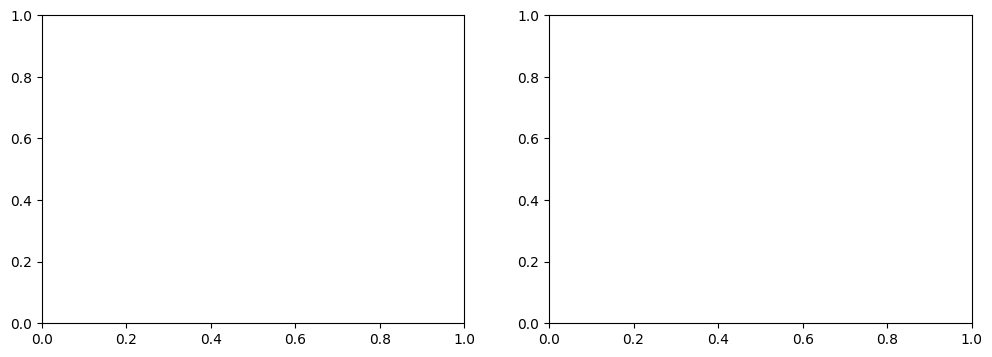

In [25]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
true_samples = data.sample(n = 100)
true_samples.head()

Original Data

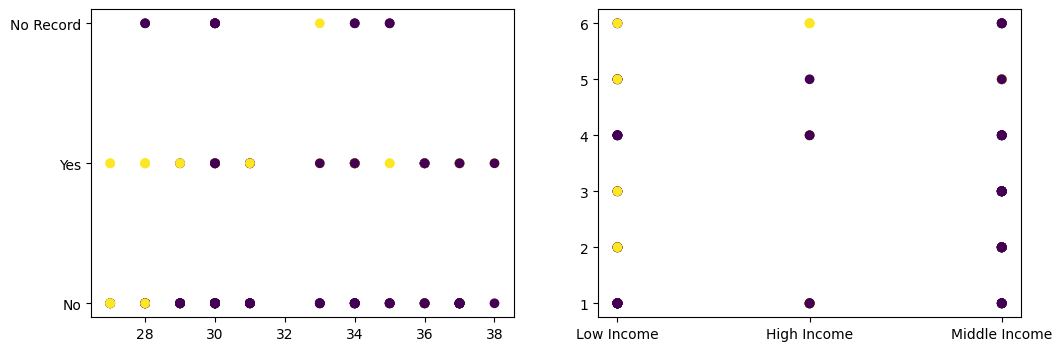

In [27]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
true_samples = data.sample(n = 200)
ax[0].scatter(true_samples["Age"], true_samples["FrequentFlyer"], c=true_samples["Target"])
ax[1].scatter(true_samples["AnnualIncomeClass"], true_samples["ServicesOpted"], c=true_samples["Target"])

Generated samples

In [28]:
samples = pd.read_csv("C:/Users/Windows 11/Desktop/Dissertation/Codes/sample_data/travel_samples.csv")

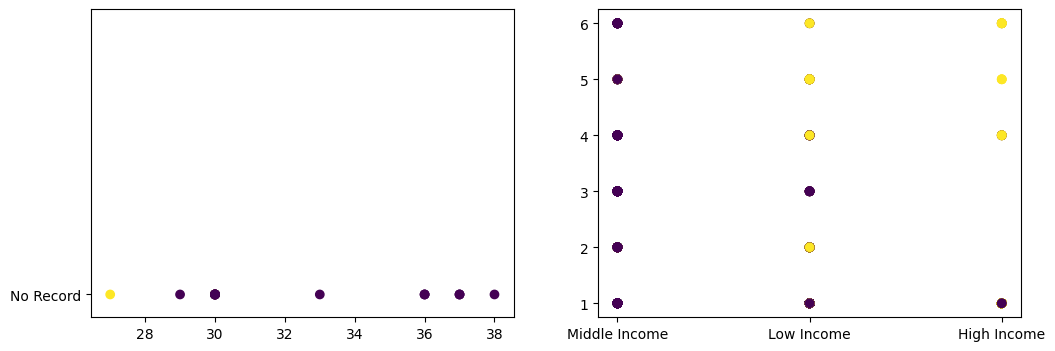

In [29]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

ax[0].scatter(samples["Age"], samples["FrequentFlyer"], c=samples["Target"])
ax[0].set_ylim(1.8, 4.5)
ax[1].scatter(samples["AnnualIncomeClass"], samples["ServicesOpted"], c=samples["Target"].astype("int"))
